In [18]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.express as px
import seaborn as sb
import matplotlib.pyplot as plt

In [19]:
global_temp = pd.read_csv('https://raw.githubusercontent.com/gindeleo/climate/master/GlobalLandTemperaturesByCountry.csv')
global_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [20]:
x = global_temp['Country']
y = x.isin(['Denmark', 'France', 'Netherlands', 'United Kingdom'])
global_temp_remove = global_temp[~y]
    
global_temp_remove = global_temp.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

countries = np.unique(global_temp_remove['Country'])
average_temp = []
for country in countries:
    average_temp.append(global_temp_remove[global_temp_remove['Country'] == country]['AverageTemperature'].mean())

In [21]:
data = global_temp.groupby(by = ['Country']).mean().reset_index()
fig = px.choropleth(data, locations = 'Country', locationmode = 'country names',
                       color = 'AverageTemperature', color_continuous_scale = px.colors.diverging.balance, 
                       title = 'The Average Temperature World Map')
fig.show()

In [22]:
data = [dict(type='choropleth', autocolorscale=False, locations = countries, z = average_temp, locationmode = 'country names',
            text = countries, colorscale = 'custom-colorscale',
            colorbar = dict(title = 'Average Temperature, °C'))]

layout = dict(title = 'Worldwide Average temp', geo = dict(showcountries = True, showframe = False, showocean = True, 
                                                 oceancolor = (100,180,222),
                                                 projection = dict(type = 'orthographic', rotation = dict(lon = 60, lat = 10)),
                                                 lonaxis =  dict(showgrid = True, gridcolor = 'rgb(0,30,30)'),
                                                 lataxis = dict(showgrid = True, gridcolor = 'rgb(0,30,30)')))

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

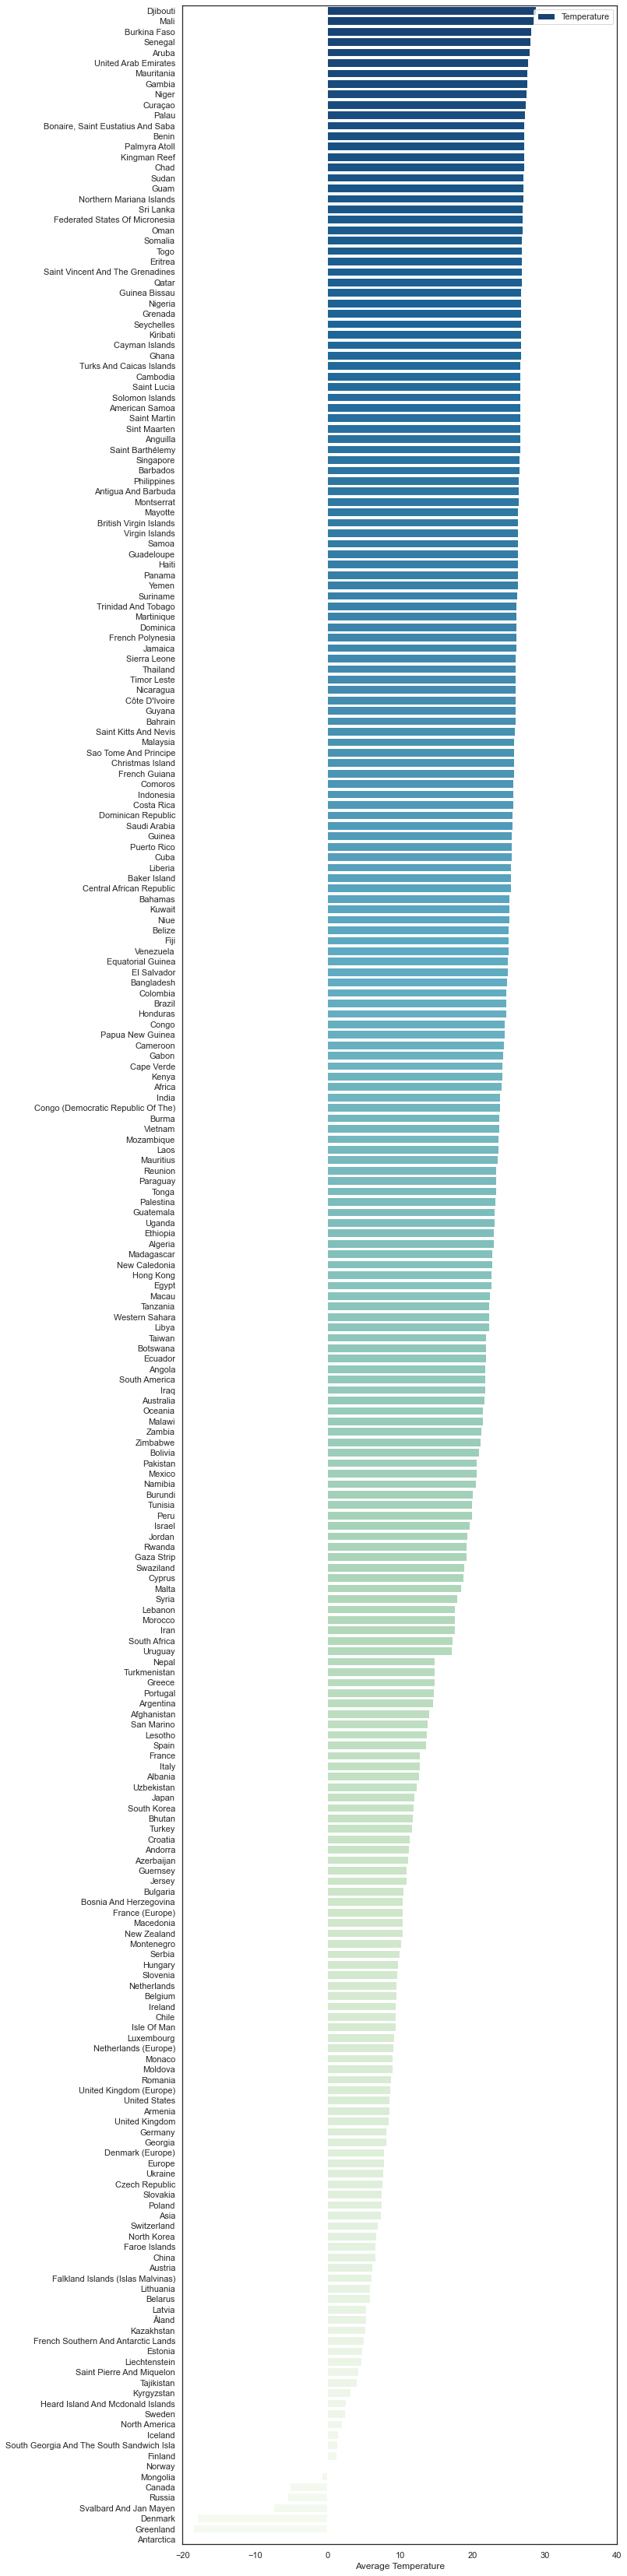

In [23]:
global_temp_asc = global_temp.groupby(by = ['Country']).mean().reset_index().sort_values('AverageTemperature',ascending=False)

fig, axes = plt.subplots(figsize=(10,60))

sb.set_color_codes("pastel")
sb.barplot(data=global_temp_asc, x='AverageTemperature', y='Country', label="Temperature", palette = 'GnBu_r')

axes.set(xlim=(-20, 40), xlabel='Average Temperature', ylabel = '')
axes.legend(loc='upper right')
sb.set(style='white',font_scale=1)